# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
%matplotlib inline
start_time = time.time()

# 2. Write Function

In [2]:
def LR_find_r(X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    fraction = ((X - Xmean)*(Y - Ymean)).sum()
    denorminator = np.sqrt(((X - Xmean)**2).sum()*((Y - Ymean)**2).sum())
    r = fraction/denorminator
    return r

In [3]:
def LR_find_ab(X, Y):
    XY = X*Y
    X2 = X**2
    Xmean = X.mean()
    Ymean = Y.mean()
    XYmean = XY.mean()
    X2mean = X2.mean()
    denorminator = X2mean - Xmean**2
    a = (XYmean - Xmean*Ymean)/denorminator
    b = (X2mean*Ymean - Xmean*XYmean)/denorminator
    return a, b

In [4]:
def LR_find_Yhat(X, a, b):
    Yhat = a*X + b
    return Yhat

In [5]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    return error

In [6]:
def find_SSE(Y, Yhat):
    SSE = ((Y - Yhat)**2).sum()
    return SSE

In [7]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y - Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [8]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [9]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y - Yhat)/Y).sum()*100/N
    return MAPE

# 3. Read Data & Prepare Data
ลองเทียบน้ำหนักคน ค่าCharges 
https://www.kaggle.com/mirichoi0218/insurance

In [10]:
Data = pd.read_csv('insurance.csv')

In [11]:
Data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
DataMatrix = Data.values

In [13]:
DataMatrix

array([[19, 'female', 27.9, ..., 'yes', 'southwest', 16884.924],
       [18, 'male', 33.77, ..., 'no', 'southeast', 1725.5523],
       [28, 'male', 33.0, ..., 'no', 'southeast', 4449.462],
       ...,
       [18, 'female', 36.85, ..., 'no', 'southeast', 1629.8335],
       [21, 'female', 25.8, ..., 'no', 'southwest', 2007.945],
       [61, 'female', 29.07, ..., 'yes', 'northwest', 29141.3603]],
      dtype=object)

In [14]:
N = DataMatrix.shape[0]

In [15]:
N #มีข้อมูลตามแนว row ทั้งหมด

1338

In [16]:
X = DataMatrix[:, 2] #อ่านเฉพาะ Column ที่ต้องการ (bmi)
#X = DataMatrix[:, 0] #อ่านเฉพาะ Column ที่ต้องการ (age)

In [17]:
Y = DataMatrix[:, 6] #อ่านเฉพาะ Column ที่ต้องการ (charges)
#Y = DataMatrix[:, 2] #อ่านเฉพาะ Column ที่ต้องการ (bmi)

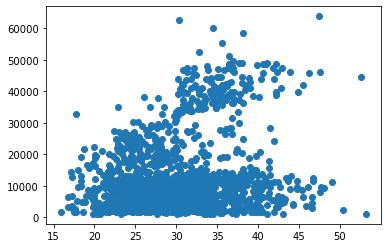

In [18]:
plt.scatter(X, Y)

In [19]:
r = LR_find_r(X, Y)

In [20]:
r # -0.8 > r < 0.8 Low positive Correlation มีความเป็น Linear

0.19834096883362906

In [21]:
# แบ่งจำนวนแนวตาราง ในการ Train
X_Train = X[:60]
Y_Train = Y[:60]

In [22]:
# แบ่งจำนวนแนวตาราง ในการ Test => row ที่ 60 - 70
X_Test = X[60:70]
Y_Test = Y[60:70]

# 4. Create Model

In [23]:
a, b = LR_find_ab(X_Train, Y_Train)

In [24]:
Yhat_Train = LR_find_Yhat(X_Train, a, b)

In [25]:
error_Train = find_error(Y_Train, Yhat_Train, 'MAPE')

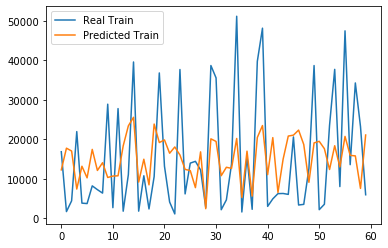

In [26]:
plt.plot(Y_Train, label = 'Real Train')
plt.plot(Yhat_Train, label = 'Predicted Train')
plt.legend()

In [27]:
error_Train

191.45881922036966

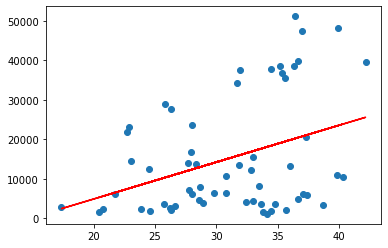

In [28]:
plt.scatter(X_Train, Y_Train)
plt.plot(X_Train, Yhat_Train, 'r')

# 5. Make Prediction

In [29]:
Yhat_Test = LR_find_Yhat(X_Test, a, b)

In [30]:
error_Test = find_error(Y_Test, Yhat_Test, 'MAPE')

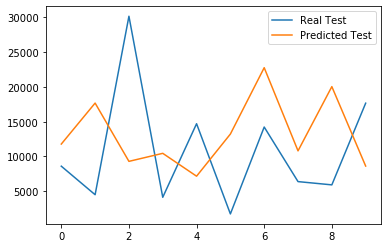

In [31]:
plt.plot(Y_Test, label = 'Real Test')
plt.plot(Yhat_Test, label = 'Predicted Test')
plt.legend()

In [32]:
error_Test

168.06116686536473

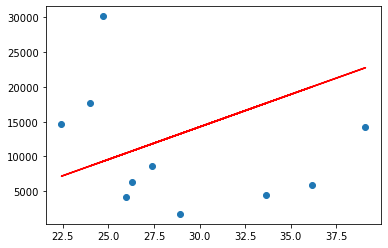

In [33]:
plt.scatter(X_Test, Y_Test)
plt.plot(X_Test, Yhat_Test, 'r')

In [34]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.3907010555267334 seconds ---
